## Key
>✅ Complete<br>
🟡 In Progress<br>
⬜ Not Started

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import modules
import os
from env import host, user, password

# wrangling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# exploring
import scipy.stats as stats

# notebook setting configuration
# pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', 100)

# Part I | Acquire and Summarize
-------------

## 1. Acquire `zillow` data
>Acquire data from mySQL using the python module to connect and query.
- 🟡 End with a single df
- ✅ Use the correct join (do not eliminate observations without values)
- ✅ Only include properties with transactions in 2017
- ⬜ Only include the last transaction for each property (***no duplicates***)
- Include:
    - ✅ Log error
    - ✅ All available fields (all db tables)
    - ⬜ Zestimate error for each property
    - ✅ Date of transaction
    

### Connection Function

In [2]:
def get_connection(db, user = user, host = host, password = password):
    '''
THIS FUNCTION TAKES IN A DATABASE AND SQL SERVER CREDENTIALS, RETURNING THE STRING THAT WILL BE
USED TO ACCESS AND CONNECT TO THAT SERVER.
    '''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
sql_query = '''
SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 

FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
       					  logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31'; 
            '''

In [4]:
def acquire_data(file_name, db):
    '''

    '''
    
    # if csv data file already exists in local directory...
    if os.path.isfile(file_name):
        
        # write the data to dataframe
        df = pd.read_csv(file_name)
    
    # if csv data file does not exist in local direction ...
    else:
        
        # read the sql query used to dataframe
        sql_query = '''
SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 

FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
       					  logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31'; 
            '''
        
        df = pd.read_sql(sql_query, get_connection(db))
        
        # cache csv file with data (will add this step later so doesn't slow down code for now)
        df.to_csv('zillow.csv')
        
    return df
    
    

In [5]:
df_acquire = acquire_data('zillow.csv', 'zillow')

In [6]:
df_acquire.head(2)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN


## 2. Summarize data
>Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

⬜ Nulls (heatmap)<br>
⬜Outliers (boxplot)<br>
⬜Zero ^<br>
⬜histograms<br>


🟡<br>
✅<br>
⬜

In [7]:
df_acquire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

>##### Lots of nulls<br><br>Mixed Dtypes

In [8]:
df_acquire.isna().sum().sort_values(ascending = False)

buildingclassdesc               77559
buildingclasstypeid             77559
finishedsquarefeet13            77532
storytypeid                     77524
basementsqft                    77524
storydesc                       77524
yardbuildingsqft26              77504
fireplaceflag                   77402
architecturalstyletypeid        77368
architecturalstyledesc          77368
typeconstructiondesc            77352
typeconstructiontypeid          77352
finishedsquarefeet6             77188
pooltypeid10                    77109
decktypeid                      76960
poolsizesum                     76705
pooltypeid2                     76500
hashottuborspa                  76035
yardbuildingsqft17              75181
taxdelinquencyyear              74674
taxdelinquencyflag              74674
finishedsquarefeet15            74547
finishedsquarefeet50            71539
finishedfloor1squarefeet        71539
fireplacecnt                    69287
threequarterbathnbr             67469
pooltypeid7 

In [9]:
float_cols = []

for col in df_acquire.columns:
    if df_acquire[col].dtype == 'float':
        float_cols.append(col)

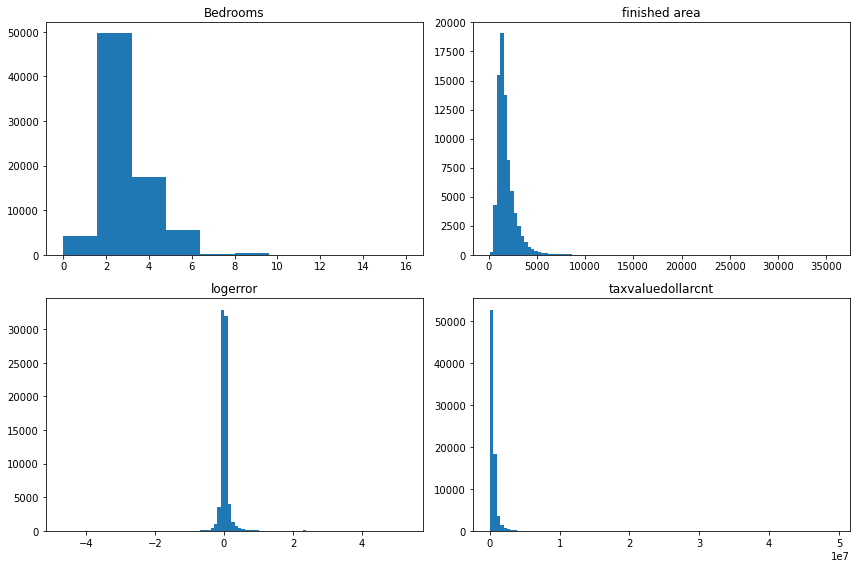

In [10]:
# plot distributions 
# - bedrooms
# - finished area
# - log error
# - tax value

plt.figure(figsize = (12,8))
# subplot 1
plt.subplot(221)
plt.hist(df_acquire.bedroomcnt, bins = 10)
plt.title('Bedrooms')

# subplot 2
plt.subplot(222)
plt.hist(df_acquire.calculatedfinishedsquarefeet, bins = 100)
plt.title('finished area')

# subplot 3
plt.subplot(223)
plt.hist(df_acquire.logerror, bins = 100)
plt.title('logerror')

# subplot4
plt.subplot(224)
plt.hist(df_acquire.taxvaluedollarcnt, bins = 100)
plt.title('taxvaluedollarcnt')

plt.tight_layout();
    

>##### Most bedrooms are between 0 - 6<br><br>Most area between 0 - 5000 sqft

## 3. Missing Rows DataFrame Function
>Write a function that takes in a dataframe of observations and returns a df with the following:

✅ each row is an atttribute name, (original df column)<br>
✅ the first column is the number of rows with missing values for that attribute,<br>
✅ and the second column is percent of total rows that have missing values for that attribute<br>
🟡 Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
def nulls_by_col(df):
    '''
THIS FUNCTION TAKES IN A DATAFRAME, FILTERING BY COLUMNS WITH NULL COUNTS > 0 AND CALCULATES THE NUMBER 
OF NULLS IN EACH COLUMN, THE PERCENTAGE OF NULLS TO TOTAL VALUES FOR EACH COLUMN, AND RETURNS A DATAFRAME 
WITH EACH COLUMN NAME AS THE INDEX WITH ROWS FOR THE NA COUNT AND PERCENTAGE, SORTED BY PERCENTAGE.
    '''
    
    num_missing = df.isna().sum()
    rows = df.shape[0]
    percent_missing = num_missing / rows
    
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': percent_missing}).sort_values(by = 'percent_rows_missing', ascending = False)
    
    return cols_missing

In [12]:
# storing the returned df in a variable

df_rows_missing = nulls_by_col(df_acquire)
df_rows_missing

NumExpr defaulting to 8 threads.


,number_missing_rows,percent_rows_missing
buildingclassdesc,77559,0.999807
buildingclasstypeid,77559,0.999807
finishedsquarefeet13,77532,0.999459
storytypeid,77524,0.999355
basementsqft,77524,0.999355
...,...,...
latitude,0,0.000000
fips,0,0.000000
bedroomcnt,0,0.000000
bathroomcnt,0,0.000000


## 4. Missing Columns DataFrame Function
>Write a function that takes in a dataframe of observations and returns a df with 3 columns:

⬜ the number of columns missing<br>
⬜ percent of columns missing,<br>
⬜ number of rows with n columns missing<br>
⬜ Run the function and document takeaways from this on how you want to handle missing values.

In [13]:
df_acquire.isna().sum(axis = 1)

0        36
1        33
2        34
3        32
4        29
         ..
77569    29
77570    33
77571    32
77572    32
77573    34
Length: 77574, dtype: int64

In [14]:
df_acquire.isna().sum(axis = 1).value_counts().sort_values(ascending = False)

33    14817
34    13356
32    12606
31     9911
36     5793
29     5285
35     5163
37     3630
30     3465
38     1932
28      457
27      316
39      285
40      230
44       79
26       65
45       50
41       29
43       29
42       26
25       24
24       13
46        5
47        3
48        3
23        2
dtype: int64

In [15]:
pd.DataFrame(df_acquire.isnull().sum(axis =1).value_counts()).reset_index()

,index,0
0,33,14817
1,34,13356
2,32,12606
3,31,9911
4,36,5793
...,...,...
21,24,13
22,46,5
23,47,3
24,48,3


In [16]:
pd.DataFrame(df_acquire.isnull().sum(axis =1), columns = ['num_cols_missing'])

,num_cols_missing
0,36
1,33
2,34
3,32
4,29
...,...
77569,29
77570,33
77571,32
77572,32


In [17]:
pd.DataFrame(df_acquire.isnull().sum(axis =1), columns = ['num_cols_missing']).groupby('num_cols_missing').count()\
    .reset_index()

,num_cols_missing
0,23
1,24
2,25
3,26
4,27
...,...
21,44
22,45
23,46
24,47


In [18]:
pd.DataFrame(df_acquire.isnull().sum(axis =1), columns = ['num_cols_missing']).groupby('num_cols_missing').count()\
    .reset_index().rename(columns = {'index': 'num_rows'})

,num_cols_missing
0,23
1,24
2,25
3,26
4,27
...,...
21,44
22,45
23,46
24,47


In [19]:
df_cols_missing = pd.DataFrame(df_acquire.isnull().sum(axis =1), columns = ['num_cols_missing']).\
reset_index().groupby('num_cols_missing')\
.count().reset_index().rename(columns = {'index': 'num_rows'})

df_cols_missing

,num_cols_missing,num_rows
0,23,2
1,24,13
2,25,24
3,26,65
4,27,316
...,...,...
21,44,79
22,45,50
23,46,5
24,47,3


In [20]:
df_cols_missing['percent_cols_missing'] = (df_cols_missing.num_cols_missing / df_acquire.shape[0])

df_cols_missing

,num_cols_missing,num_rows,percent_cols_missing
0,23,2,0.000296
1,24,13,0.000309
2,25,24,0.000322
3,26,65,0.000335
4,27,316,0.000348
...,...,...,...
21,44,79,0.000567
22,45,50,0.000580
23,46,5,0.000593
24,47,3,0.000606


In [21]:
def cols_missing(df):
    
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    
    df2['percent_cols_missing'] = df2.num_cols_missing/df.shape[1]
    
    return df2

In [22]:
df_test_cols_missing_func = cols_missing(df_acquire)

df_test_cols_missing_func.sort_values(by = ['percent_cols_missing'], ascending = False)

,num_cols_missing,num_rows,percent_cols_missing
25,48,3,0.705882
24,47,3,0.691176
23,46,5,0.676471
22,45,50,0.661765
21,44,79,0.647059
...,...,...,...
4,27,316,0.397059
3,26,65,0.382353
2,25,24,0.367647
1,24,13,0.352941


# Part II | Prepare
-------------------

## 1. Remove non-Single Unit Properties
>(e.g. no duplexes, no land/lot, ...) **Do *not* purely filter by unitcnt as we did previously.** Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [23]:
df_acquire.shape

(77574, 68)

In [24]:
df_acquire.unitcnt.value_counts(dropna = False)

1.0      47412
NaN      26872
2.0       2031
4.0        726
3.0        529
42.0         1
237.0        1
45.0         1
6.0          1
Name: unitcnt, dtype: int64

In [26]:
single_unit = [261, 262, 263, 264, 266, 268, 273, 276, 279]

df_single_unit = df_acquire[df_acquire.propertylandusetypeid.isin(single_unit)]

df_single_unit = df_acquire[(df_acquire.bedroomcnt > 0) & (df_acquire.bathroomcnt > 0) & ((df_acquire.unitcnt<=1)|df_acquire.unitcnt.isnull()) & (df_acquire.calculatedfinishedsquarefeet>350)]

df_single_unit.head(2)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN


In [27]:
df_single_unit.shape

(73735, 68)

## 2. Handle Missing Values Function
`handle_missing_values(` df, prop_required_cols, prop_required_rows`)`<br>
<br>

#### Input
- df 
- number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing)
- number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing)

#### Output
- dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function **Hint** *Look up the dropna documentation*
- Make use of inplace, i.e. inplace=True/False

In [28]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .7):
    '''
THIS FUNCTION TAKES IN A DATAFRAME WITH NULL VALUES, PROPORTION THRESHOLD OF COLUMNS, AND PROPORTION
THRESHOLD OF ROWS, AND RETURNS A DF THAT DROPS THE ROWS AND COLUMNS WITH NULL VALUES THAT EXCEED THOSE
THRESHOLDS.
    '''
    
    #drop columns
    threshold = int(round(prop_required_column * len(df.index), 0))
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows
    threshold = int(round(prop_required_row * len(df.index), 0))
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    return df

In [30]:
handle_missing_values(df_acquire)



,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc


In [ ]:
def handl_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [ ]:
handl_missing_values(df_single_unit)

## 3. Handling Missing Values
- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

># `wrange_zillow.py`

# Part 4 | Mall Customers
-----------

## 1. Acquire
>Acquire data from mall_customers.customers in mysql database.

## 2. Summarize
>Summarize data (include distributions and descriptive statistics).


## 3. Outliers
>Detect outliers using IQR.

## 4. Split
>Split data (train, validate, and test split).

## 5. Encode
> Encode categorical columns using a one hot encoder (pd.get_dummies).


## 6. Missing Values
>Handles missing values.

## 7. Scaling

># `wrangle_mall.py`
>1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling